# Filtrage de signaux

In [1]:
# librairies pour l'interaction
%matplotlib notebook
from ipywidgets import interact, FloatSlider, Layout
import ipywidgets as widgets

In [2]:
# librairies scientifiques usuelles
import numpy as np
import scipy
import scipy.fftpack
# pour les graphiques
import matplotlib.pyplot as plt

Ce code permet de visualiser l'influence d'un filtre dont on connaît la fonction de transfert sur un signal quelconque. On commence par définir la fonction de transfert associée à un filtre passe-bas d'ordre 2 et de fréquence de coupure $f_c$ :
$$\underline{H}= \frac{1}{1 - \left(\frac{f}{f_c}\right)^2 + \frac{j}{Q} \frac{f}{f_c}}.$$

In [3]:
def H(f, fc):
    """Fonction de transfer d'un filtre passe-bas d'ordre 2
    """
    Q = 1/np.sqrt(2)  # Facteur de qualité
    return 1/(1 - (f/fc)**2 + 1j/Q*(f/fc))

On définit le signal qu'on veut filtrer, ici une somme de deux sinusoïdes de fréquences $f_1$ et $f_2$ :
$$v_e(t) = A \sin(2 \pi f_1 t) +B \sin(2 \pi f2 t).$$

In [4]:
# Tableau des temps :

tmax = 1e-2  # temps maximal à afficher (en secondes).

# Pour le filtrage, on génère une durée k*tmax de signal à filtrer
# (tout ne sera pas affiché)
k = 10
npoints = 10000
t = np.linspace(0, k*tmax, npoints)

# Le signal proprement dit
f1 = 200  # Hz
f2 = 2000  # Hz
def ve(t):
    return 10 * np.sin(2*np.pi*f1*t) + 5 * np.sin(2*np.pi*f2*t) 

Le code ci-desous est celui qui filtre effectivement le signal.

<IPython.core.display.Javascript object>


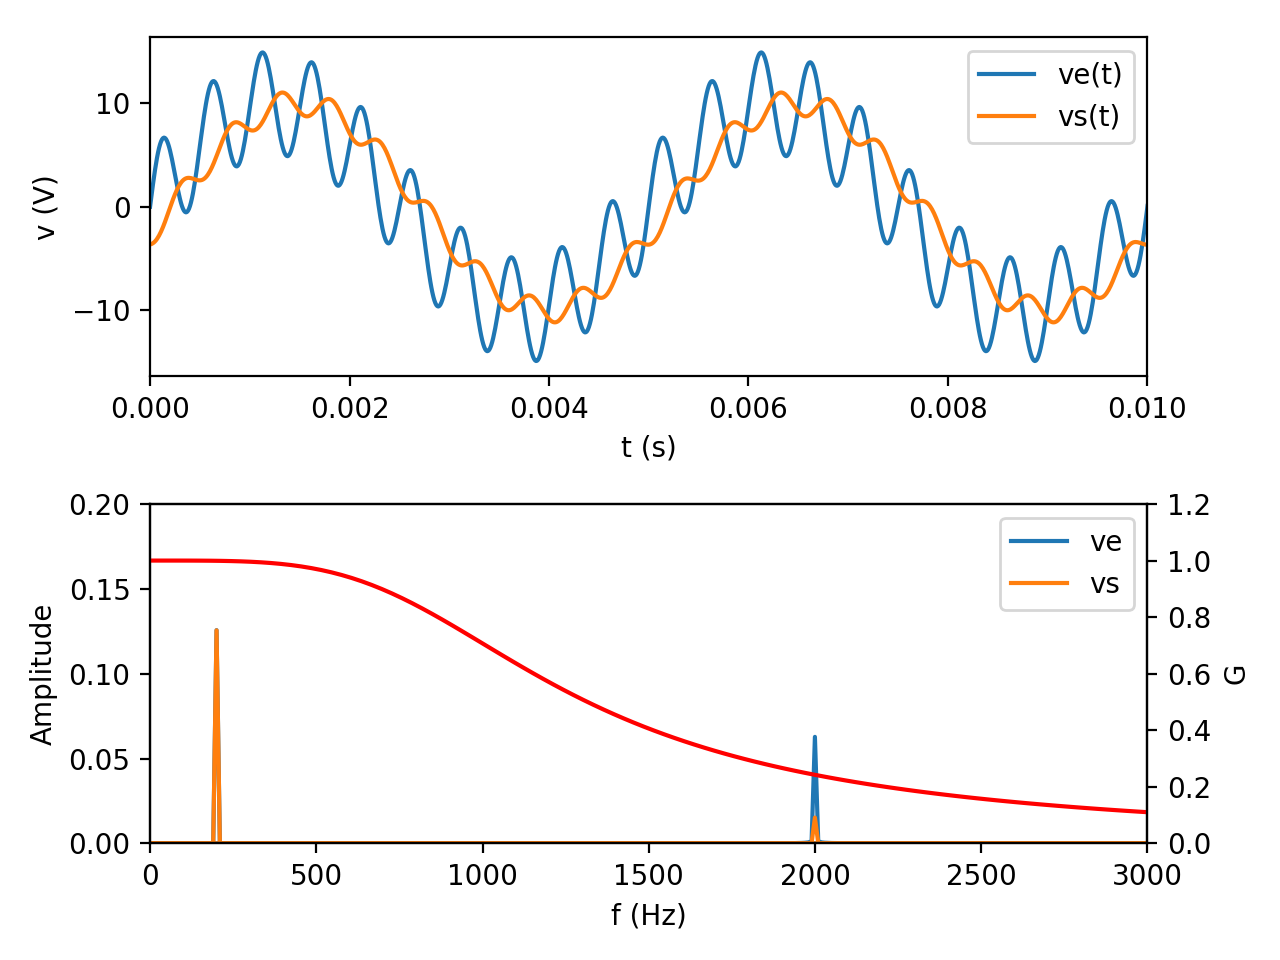

interactive(children=(FloatSlider(value=1000.0, description='fc (Hz)', layout=Layout(height='40px', width='80%…

<function __main__.update(fc)>

In [7]:
# On définit le signal.
signal = ve(t)

# On calcule la transformée de Fourier du signal
fft_e = scipy.fft(signal)
# On génère les fréquences associées
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])

# On filtre le signal
fc = 1000  # Fréquence de coupure choisie pour initialiser (en Hz)
fft_s = H(freqs, fc)*fft_e

# À l'issue de ces oppérations freqs, fft_e et fft_s sont des tableaux de même taille
# freqs contient les fréquences pour lesquelles on a calculé la transformée de Fourier
# fft_e contient l'amplitude complexe pour chaque fréquence du signal d'entrée
# fft_s contient l'amplitude complexe pour chaque fréquence du signal de sortie

# Pour trouver le ignal de sortie, on fait la transformée de Fourier inverse
vs = scipy.ifft(fft_s)


# Tracé des différents graphiques
fig = plt.figure()

# Domaine temporel 
ax1 = fig.add_subplot(211)
ax1.plot(t, signal, label="ve(t)")
lvs,=ax1.plot(t,vs, label="vs(t)")
plt.xlabel("t (s)")
plt.ylabel("v (V)")
plt.xlim([0, tmax])
ax1.legend()

# Domaine fréquentiel
ax2 = fig.add_subplot(212)
ax2.plot(freqs, abs(fft_e)/max(fft_e), label="ve")
lvsfft, = ax2.plot(freqs,abs(fft_s)/max(fft_e),label="vs")
plt.xlabel("f (Hz)")
plt.ylabel("Amplitude")
fmin = 0
fmax = 3000
plt.xlim([fmin, fmax])
plt.ylim([0,.2])
ax2.legend()

# Gain
ff = np.linspace(fmin, fmax, 100)
ax3 = ax2.twinx()
G = abs(H(ff, fc))
lG, = ax3.plot(ff, G, 'r', label="G")
plt.xlim([fmin, fmax])
plt.ylim([0, 1.2])
plt.ylabel('G')

plt.tight_layout()




def update(fc):
    """
    Met le graphe à jour quand on bouge le curseur en générant un nouveau jeu de données simulant un échantillonnage à la fréquence correspondante
    """
    fft_s = H(freqs, fc)*fft_e
    vs = scipy.ifft(fft_s)
    G  = abs(H(ff, fc))
    lG.set_data(ff, G)
    lvs.set_data(t,vs)
    lvsfft.set_data(freqs,abs(fft_s)/max(fft_e))
    
interact(update, fc=FloatSlider(min=fc/10, max=10 * fc, value=fc, step=100,
                                   description='fc (Hz)', layout=Layout(width='80%', height='40px')))
